##Sentiment Analysis using DNLP

In [1]:
import numpy as np
import pandas as pd 

In [71]:
df= pd.read_csv('train.csv')
df=df.drop(columns=['url','host','qa_id','question_user_name','question_user_page','answer_user_name','answer_user_page'])
#df['average answer points']=round((df['answer_helpful']+df['answer_level_of_information']+df['answer_relevance']+df['answer_type_procedure']+df['answer_type_reason_explanation']+df['answer_well_written']+df['answer_plausible']+df['answer_satisfaction']+df['answer_type_instructions'])/9)
df=df.drop(columns=['answer_helpful','answer_level_of_information','answer_relevance','answer_type_procedure','answer_type_reason_explanation','answer_well_written','answer_type_instructions','answer_satisfaction','answer_plausible'])
#df['average question points']=round((df['question_asker_intent_understanding']+df['question_body_critical']+df['question_conversational']+df['question_expect_short_answer']+df['question_fact_seeking']+df['question_has_commonly_accepted_answer']+df['question_interestingness_others']+df['question_interestingness_self']+df['question_multi_intent']+df['question_not_really_a_question']+df['question_opinion_seeking']+df['question_type_choice']+df['question_type_compare']+df['question_type_consequence']+df['question_type_definition']+df['question_type_entity']+df['question_type_instructions']+df['question_type_procedure']+df['question_type_reason_explanation']+df['question_type_spelling']+df['question_well_written'])/21)
df=df.drop(columns=['question_title','answer','question_asker_intent_understanding','question_body_critical','question_conversational','question_expect_short_answer','question_expect_short_answer','question_fact_seeking','question_has_commonly_accepted_answer','question_interestingness_others','question_interestingness_self','question_multi_intent','question_not_really_a_question','question_opinion_seeking','question_type_choice','question_type_compare','question_type_consequence','question_type_definition','question_type_entity','question_type_instructions','question_type_procedure','question_type_reason_explanation','question_type_spelling','question_well_written'])
df=df.dropna(how='any')
df

,question_body,category
0,After playing around with macro photography on...,LIFE_ARTS
1,I am trying to understand what kinds of places...,CULTURE
2,I'm working on a PCB that has through-hole com...,SCIENCE
3,"An affidavit, from what i understand, is basic...",CULTURE
4,I am trying to make a binary image. I want mor...,LIFE_ARTS
...,...,...
6074,I am curious if anyone uses a skiing helmet fo...,CULTURE
6075,I have a road bike with a front brake that wea...,CULTURE
6076,I'm tailing a log file using tail -f messages....,TECHNOLOGY
6077,What are people's views on this? To be specif...,SCIENCE


In [72]:
df['category'].unique()

array(['LIFE_ARTS', 'CULTURE', 'SCIENCE', 'STACKOVERFLOW', 'TECHNOLOGY'],
      dtype=object)

In [73]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['category']= label_encoder.fit_transform(df['category']) 
df['category'].unique()

array([1, 0, 2, 3, 4])

In [75]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
corpus1=[]
corpus2=[]
for i in range(0, 6079):
  review = re.sub('[^a-zA-Z]', ' ', df['question_body'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
print(corpus)


['play around macro photographi cheap read revers len rev len mount straight len passiv extens tube would like get problem techniqu use focu manual apertur control problemat best limit setup still subject read dead insect spring approach want abl shoot live insect believ autofocu settabl apertur great help one obviou expens option macro len say ef mm macro howev not realli interest yet anoth prime len altern electr extens tube except maximum focus distanc lose use tube coupl fine len say ef instead macro len', 'tri understand kind place spam valu p refer th edit main book shadowrun per p sprawl plex plex metropolitan complex short metroplex per googl metroplex larg metropolitan area especi one aggreg two citi citi downtown sprawl downtown would tend similar densiti reason sprawl includ suburb higher spam zone nois rate p similarli think downtown dens noisi e g offic build street vendor commerci district e g outdoor mall nois rate make think think incorrectli better way think', 'work pc

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y=df.iloc[:,-1].values

In [89]:
X[:1,:]

array([[0, 0, 1, ..., 0, 1, 0]])

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Neural Network  Implementation

In [81]:
import tensorflow as tf
from sklearn.model_selection import train_test_split



In [82]:
classs = { 1:"CULTURE",
           2:"LIFE_ARTS",
           3:"SCIENCE",
           4:"STACKOVERFLOW",
           5:"TECHNOLOGY"
           }

In [83]:
y_train = tf.keras.utils.to_categorical(y_train,5)
y_test = tf.keras.utils.to_categorical(y_test,5)

In [84]:
print("Initialized model")
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))
ann.add(tf.keras.layers.Dense(units=5, activation='softmax'))

Initialized model


In [85]:
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = ann.fit(X_train, y_train, batch_size=15, epochs=10, validation_data=(X_test, y_test))
ann.save("DNLP.h5")

Epoch 1/10
325/325 [==============================] - 1s 2ms/step - loss: 1.3484 - accuracy: 0.4449 - val_loss: 0.7529 - val_accuracy: 0.7582
Epoch 2/10
325/325 [==============================] - 1s 2ms/step - loss: 0.5869 - accuracy: 0.8187 - val_loss: 0.5816 - val_accuracy: 0.8117
Epoch 3/10
325/325 [==============================] - 1s 2ms/step - loss: 0.3090 - accuracy: 0.9129 - val_loss: 0.5496 - val_accuracy: 0.8388
Epoch 4/10
325/325 [==============================] - 1s 2ms/step - loss: 0.1624 - accuracy: 0.9621 - val_loss: 0.5897 - val_accuracy: 0.8470
Epoch 5/10
325/325 [==============================] - 1s 2ms/step - loss: 0.0977 - accuracy: 0.9801 - val_loss: 0.6403 - val_accuracy: 0.8536
Epoch 6/10
325/325 [==============================] - 1s 3ms/step - loss: 0.0615 - accuracy: 0.9866 - val_loss: 0.7225 - val_accuracy: 0.8586
Epoch 7/10
325/325 [==============================] - 1s 2ms/step - loss: 0.0327 - accuracy: 0.9953 - val_loss: 0.7892 - val_accuracy: 0.8602
Epoch 

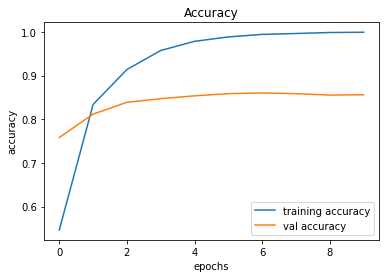

In [86]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('Accuracy.png')

Saved Model & Graph to disk


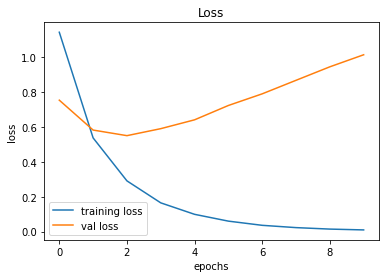

In [87]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('Loss.png')
print("Saved Model & Graph to disk")

In [99]:
model = tf.keras.models.load_model('DNLP.h5')
print("Loaded model from disk")
test=[[X[5:6,:]]]
result = model.predict_classes(test)[0]
cat= classs[result + 1]
print("The category for the same is {}".format(cat))


Loaded model from disk
The category for the same is STACKOVERFLOW


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
